Training with SGD optimizer


d:\Apk\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with MiniBatchGD optimizer
Training with Momentum optimizer
Training with Nesterov optimizer
Training with Adagrad optimizer
Training with Adam optimizer


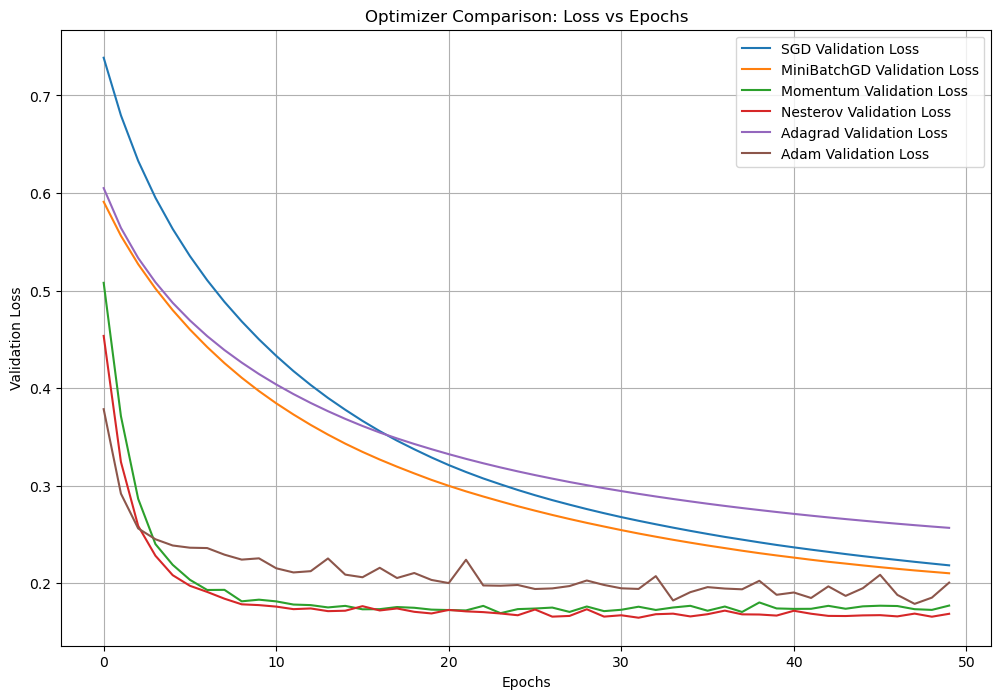

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# TensorFlow and Keras imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, Adagrad

# Load the dataset from the CSV file
df = pd.read_csv('Social_Network_Ads.csv')

# Selecting relevant columns: 'Age', 'EstimatedSalary', and 'Purchased'
X = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to build the model
def build_model(optimizer):
    model = Sequential()
    model.add(Dense(10, input_dim=X_train_scaled.shape[1], activation='relu'))  # Single hidden layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

    # Compile the model
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define different optimizers with required configurations
optimizers = {
    'SGD': SGD(learning_rate=0.01),  # Stochastic Gradient Descent
    'MiniBatchGD': SGD(learning_rate=0.01),  # Same as SGD since Keras uses mini-batches by default
    'Momentum': SGD(learning_rate=0.01, momentum=0.9),  # Momentum Gradient Descent
    'Nesterov': SGD(learning_rate=0.01, momentum=0.9, nesterov=True),  # Nesterov Accelerated GD
    'Adagrad': Adagrad(learning_rate=0.01),  # Adagrad
    'Adam': Adam(learning_rate=0.01)  # Adam Optimizer
}

# Dictionary to store the loss results over epochs for each optimizer
history_dict = {}

# Train the model with each optimizer and store the history
for opt_name, optimizer in optimizers.items():
    print(f"Training with {opt_name} optimizer")
    
    # Build the model
    model = build_model(optimizer)
    
    # Train the model and save the training history (also store the validation loss)
    history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=10, verbose=0)
    
    # Store the history for plotting
    history_dict[opt_name] = history

# Plotting the comparison of loss vs epoch
plt.figure(figsize=(12, 8))

for opt_name, history in history_dict.items():
    plt.plot(history.history['val_loss'], label=f'{opt_name} Validation Loss')

plt.title('Optimizer Comparison: Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


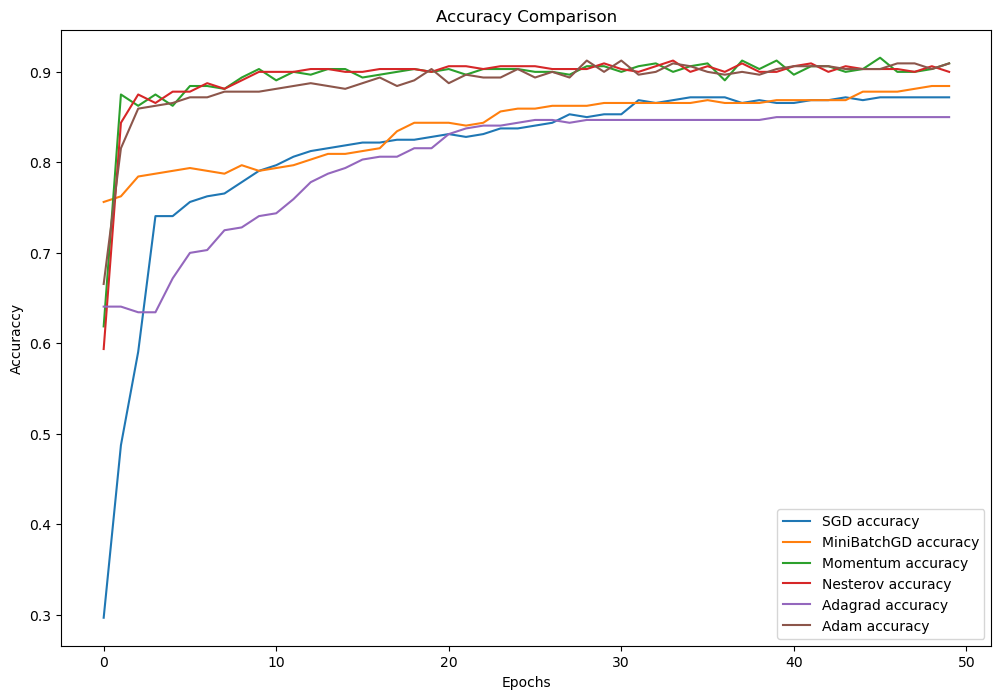

In [4]:
plt.figure(figsize=(12, 8))

for name, history in history_dict.items():
    plt.plot(history.history['accuracy'], label=f'{name} accuracy')

plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuraccy')
plt.legend()
plt.show()